In [206]:
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

In [207]:
class AdalineGD:
    """ 
    ADAptive LInear NEuron classifier with Gradient Descent.

    Instead of calculating the the weights after each epoch, we are going to do it based on the entire batch.

    Parameters
    ----------
    eta: float
        Learning Rate (between 0 and 1)
    n_iter: int
        Passes over the training dataset
    random_state: int
        Random number generator for random weight initialization

    Attributes
    ----------
    w_: 1d-array
        Weights after fitting
    b_: Scalar
        Bias unit after fitting
    errors_: list
        Number of misclassifications (updates) in each epoch

    """
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
    
    def fit(self,X,y):
        """
        Fit Training Data.

        Parameters
        ----------
        x: {array-like}, shape = [n_examples, n_features] // Descriptive Features
            Training vectors, where n_examples is the number of examples and n_features is the number of features
        y: array-like, shape = [n_examples]               // Target Features
            Target values

        Returns
        -------
        self: object
        """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc = 0.0, 
                              scale = 0.01, 
                              size = X.shape[1])
        self.b_ = np.float_(0.)
        self.losses_ = []

        for i in range(self.n_iter):
            net_input = self.net_input(X)
            output = self.activation(net_input)
            errors = (y - output)
            self.w_ += self.eta * 2.0 * X.T.dot(errors) / X.shape[0]
            self.b_ += self.eta * 2.0 * errors.mean()
            loss = (errors ** 2).mean()
            self.losses_.append(loss)
        return self
    
    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_) + self.b_
    
    def activation(self, X):
        """Compute linear activation"""
        return X
    
    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.activation(self.net_input(X)) >= 0.5, 1, 0)
        

In [208]:
s = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
print('FROM URL: ',s )
df = pd.read_csv(s, 
                 header=None,
                 encoding='utf-8')
print(df.tail())

# Select setosa and versicolor of the first 100 entries
y = df.iloc[0:100, 4].values
# Converts Iris-setosa to 0 and Iris-versicolor to 1
y = np.where(y == 'Iris-setosa', 0, 1)
# Select sepal length and petal length of the first 100 entries
X = df.iloc[0:100, [0,2]].values

FROM URL:  https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data
       0    1    2    3               4
145  6.7  3.0  5.2  2.3  Iris-virginica
146  6.3  2.5  5.0  1.9  Iris-virginica
147  6.5  3.0  5.2  2.0  Iris-virginica
148  6.2  3.4  5.4  2.3  Iris-virginica
149  5.9  3.0  5.1  1.8  Iris-virginica


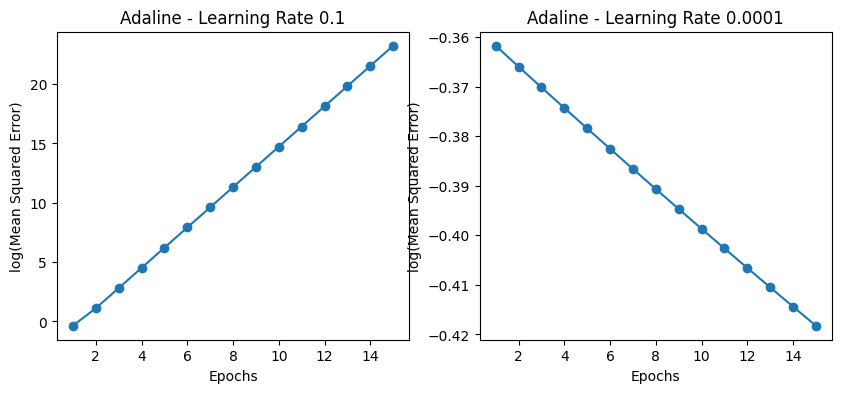

In [209]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,4))

# A well chosen learning rate where we do not overshoot the global minimum
ada1 = AdalineGD(n_iter = 15, eta = 0.1).fit(X,y)
ax[0].plot(range(1,len(ada1.losses_) + 1),
           np.log10(ada1.losses_), marker = 'o')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('log(Mean Squared Error)')
ax[0].set_title('Adaline - Learning Rate 0.1')

# A learning rate that is too large and we overshoot the global minimum
ada2 = AdalineGD(n_iter = 15, eta = 0.0001).fit(X,y)
ax[1].plot(range(1,len(ada2.losses_) + 1),
           np.log10(ada2.losses_), marker = 'o')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('log(Mean Squared Error)')
ax[1].set_title('Adaline - Learning Rate 0.0001')
plt.show()

In [210]:
# Standardizes the x and y values of the data frame to around [-1.3 : 1.6]
X_std = np.copy(X)
X_std[:,0] = (X[:,0] - X[:,0].mean()) / X[:,0].std()
X_std[:,1] = (X[:,1] - X[:,1].mean()) / X[:,1].std()
# print(np.sort(X_std))

In [211]:
# Training Adaline on the standardized dataset
ada_gd = AdalineGD(n_iter = 20, eta = 0.5)
ada_gd.fit(X_std, y)

In [212]:
def plot_decision_regions(X,y,classifier, resolution=0.02):

    # Setup marker generator and color map
    markers = ('o', 's', '^', 'v', '<')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    # Plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1   # Range of the first feature
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1   # Range of the second feature
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    lab = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    lab = lab.reshape(xx1.shape)

    plt.contourf(xx1, xx2, lab, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())                          # Sets the x limit on the plot
    plt.ylim(xx2.min(), xx2.max())                          # Sets the y limit on the plot

    # Plot class examples on the graph
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x = X[y == cl, 0],
                    y = X[y == cl, 1],
                    alpha = 0.8,
                    c=colors[idx],
                    marker=markers[idx],
                    label=f'Class {cl}',
                    edgecolor='black')

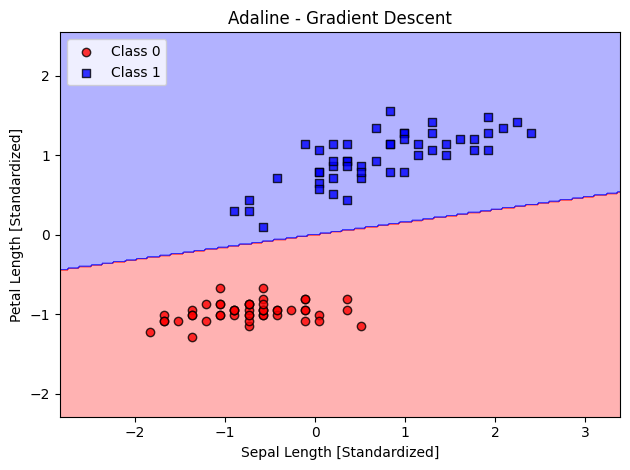

In [213]:
# Plots the standardized Adaline Gradient Descent model
# Smaller range than the Perceptron model 
plot_decision_regions(X_std, y, classifier=ada_gd)
plt.title('Adaline - Gradient Descent')
plt.xlabel('Sepal Length [Standardized]')
plt.ylabel('Petal Length [Standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

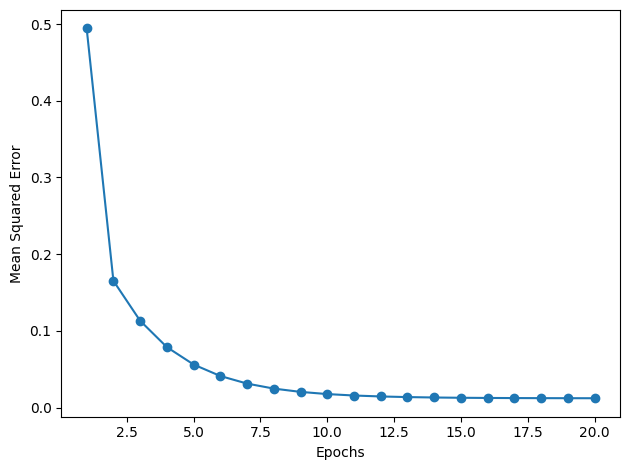

In [214]:
# Plots the loss of Adaline using the standardized dataset
# Adaline gradient descent losses is going down after each epoch 
#   because we are evaluating the dataset in its entirety every 
#   iteration.
plt.plot(range(1, len(ada_gd.losses_) + 1), 
         ada_gd.losses_, 
         marker='o')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.tight_layout()
plt.show()